
<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>De beste vier op een rij strategie</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Isa Dijkstra</td>
                <td style="border: 0;">IsaD01</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="photo/agent.png" alt="genres" style="width: 1000px; height: auto;">
</div>

- Docent: Vikram Radhakrishnan
- Datum: 28-03-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Inhoudsopgave </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: Het project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Packages, functies en agents inladen</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Verschillende agents tegen elkaar testen</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Verschillende agents uitgelegd </a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: Resultaten van het testen</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 6: Bronnenlijst</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: Het project </strong></h2>

</ul>

Connect Four is een strategisch bordspel waarin twee spelers om de beurt schijven in een bord laten vallen. Het doel is om als eerste vier schijven op een rij te krijgen, horizontaal, verticaal of diagonaal.Het kan erg lastig zijn voor spelers om telkens de beste zet te maken. Omdat het spel meerdere mogelijke zetten en strategische varianten heeft, zien spelers niet altijd alle kansen of dreigingen. Dit kan leiden tot fouten: spelers missen soms een winnende zet of laten de tegenstander een winnende kans liggen.

**Doelstelling**

Onze doelstelling:

We willen een systeem ontwikkelen dat automatisch de beste zet bepaalt zodat: 

-	Het risico op fouten wordt verkleind. 
-	Het spel strategisch wordt benaderd, zowel om te winnen als om te voorkomen dat de tegenstander wint.

**Waarom rule-based?**

Een rule-based systeem is geschikt omdat Connect Four duidelijke regels heeft, zoals:
-	Spelers doen om de beurt een zet.
-	Een schijf valt naar de laagste vrije plek in een kolom.
-	Het doel is om vier op een rij te krijgen.

Met een rule-based systeem kun je deze regels programmeren zonder dat het systeem zelf hoeft te leren via data. Je maakt gewoon een set regels die het systeem volgt, zoals:
-	Blokkeer de tegenstander als die bijna wint.
-	Maak een winnende zet als dit mogelijk is.
-	Neem het midden in beslag

**Rule based versus machine learning**

Voordelen van een rule-based system:
-	Eenvoudig te begrijpen: De regels van Connect Four zijn helder en kunnen direct als logische voorwaarden worden geprogrammeerd.
-	Snelle implementatie: Je hoeft geen grote dataset te verzamelen en te trainen zoals bij machine learning.
-	Controleerbaarheid: Omdat het regels volgt die zelf zijn gemaakt, weet je waarom het systeem bepaalde beslissingen neemt.

Machine learning zou hier minder effectief zijn omdat:
-	Veel data nodig: Machine learning vereist grote hoeveelheden data om effectief te zijn.
-	Onvoorspelbaar: Het model mogelijk willekeurige beslissingen neemt zonder dat je weet waarom.
-	Minder uitlegbaar: Het is lastiger om te begrijpen waarom het model een bepaalde zet kiest.


---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Packages, functies en agents inladen</strong></h2>

</ul>

Packages inladen

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pettingzoo.classic import connect_four_v3

Een map omhoog om zo de agents juist inteladen

In [2]:
os.chdir("..")

In [3]:
from src.agents import MinMaxAgent, RandomAgent, DoubleMoveAgent, GreedyAgent

Testen of het test bestand goed werkt 

In [4]:
!python -m unittest discover tests

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


Functie om agents een potje te laten spelen

In [5]:
def evaluate_agents(agent1, agent2, n_games=50):
    """
    Laat agent1 en agent2 meerdere potjes Connect Four spelen.

    Parameters:
    - agent1: De eerste agent die deelneemt aan het spel.
    - agent2: De tweede agent die deelneemt aan het spel. 
    - n_games (int, optioneel): Het aantal spellen dat de agents tegen elkaar spelen. 

    Returns:
    - wins_agent1 (int): Het aantal overwinningen van agent1.
    - wins_agent2 (int): Het aantal overwinningen van agent2.
    - draws (int): Het aantal gelijke spelen.
    
    """
    wins_agent1 = 0
    wins_agent2 = 0
    draws = 0

    for _ in range(n_games):
        env = connect_four_v3.env(render_mode=None)
        env.reset()
        
        done = False
        
        while not done:
            obs = env.observe(env.agent_selection)
            board = obs['observation'][:,:,0]
            
            current_player_id = 1 if env.agent_selection == "player_0" else 2
            
            # Kies de juiste agent
            if current_player_id == agent1.player:
                move = agent1.select_action(board)
            else:
                move = agent2.select_action(board)
            
            env.step(move)
            done = any(env.terminations.values()) or any(env.truncations.values())

        reward_p0 = env.rewards["player_0"]
        reward_p1 = env.rewards["player_1"]
        if reward_p0 == 1:
            winner = 1
        elif reward_p1 == 1:
            winner = 2
        else:
            winner = 0 

        if winner == agent1.player:
            wins_agent1 += 1
        elif winner == agent2.player:
            wins_agent2 += 1
        else:
            draws += 1

    return wins_agent1, wins_agent2, draws

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Verschillende agents tegen elkaar testen </strong></h2>
</div>

In [6]:
rule_agent = MinMaxAgent(player=1)
random_agent = RandomAgent(player=2)

wins_rule, wins_random, draws = evaluate_agents(rule_agent, random_agent, n_games=20)

print(f"Resultaten over 2 potjes:")
print(f" - MinMax agent agent (player=1) heeft gewonnen: {wins_rule}")
print(f" - Random agent       (player=2) heeft gewonnen: {wins_random}")
print(f" - Gelijke spelen: {draws}")

[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
Resultaten over 2 potjes:
 - MinMax agent agent (player=1) heeft gewonnen: 15
 - Random agent       (player=2) heeft gewonnen: 1
 - Gelijke spelen: 4


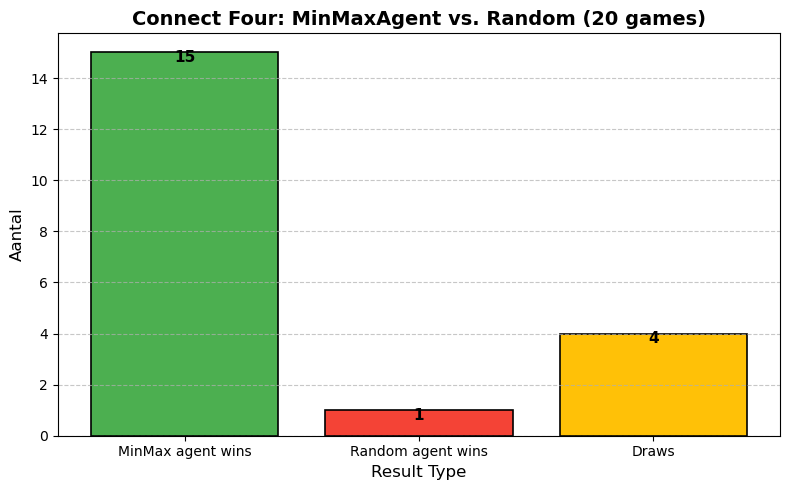

In [7]:
labels = ["MinMax agent wins", "Random agent wins", "Draws"]
scores = [wins_rule, wins_random, draws]
colors = ['#4CAF50', '#F44336', '#FFC107']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=colors, edgecolor='black', linewidth=1.2)

plt.title("Connect Four: MinMaxAgent vs. Random (20 games)", fontsize=14, fontweight='bold')
plt.xlabel("Result Type", fontsize=12)
plt.ylabel("Aantal", fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.09,
        int(yval),
        ha='center',
        va='top',  
        fontsize=11,
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
agents = {
    "RandomAgent": RandomAgent,
    "MinMaxAgent": MinMaxAgent,
    "GreedyAgent": GreedyAgent,
    "DoubleMoveAgent": DoubleMoveAgent
}

results = defaultdict(int)  # houdt totaal aantal gewonnen spellen per agent bij
match_results = []

n_games = 50  # aantal spellen om te spelen

for name1, Agent1 in agents.items():
    for name2, Agent2 in agents.items():
        if name1 == name2:
            continue  # niet tegen zichzelf

        agent1 = Agent1(player=1)
        agent2 = Agent2(player=2)
        
        wins_1, wins_2, draws = evaluate_agents(agent1, agent2, n_games=n_games)
        
        results[name1] += wins_1
        results[name2] += wins_2
        
        match_results.append({
            "Speler 1": name1,
            "Speler 2": name2,
            "Wins speler 1": wins_1,
            "Wins speler 2": wins_2,
            "Draws": draws
        })

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nEindscore:")
for name, score in sorted_results:
    print(f"{name}: {score} overwinningen")

print("\nMatch-details:")
for match in match_results:
    print(f"{match['Speler 1']} vs {match['Speler 2']} -> "
          f"{match['Wins speler 1']} - {match['Wins speler 2']} (Draws: {match['Draws']})")

[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] conta

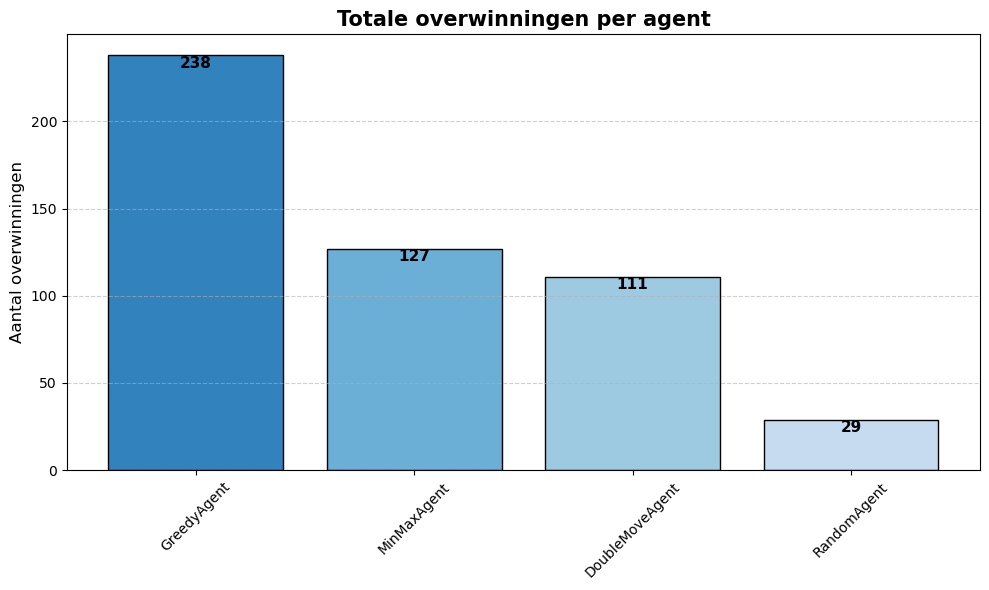

In [ ]:
agent_names = [name for name, _ in sorted_results]
total_wins = [score for _, score in sorted_results]

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(agent_names)]
bars = plt.bar(agent_names, total_wins, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.3, str(height),
             ha='center', va='top', fontsize=11, fontweight='bold')

plt.title("Totale overwinningen per agent", fontsize=15, fontweight='bold')
plt.ylabel("Aantal overwinningen", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Verschillende agents uitgelegd </strong></h2>
</div>

Hier leggen wij kort uit wat de vier verschillende "agents" doen en wat hun strategie is. Ook leggen we per "agent" uit wat de voor- en nadelen zijn. 



---

### 1. RandomAgent

De RandomAgent is onze meest eenvoudige agent. Deze agent kiest willekeurig uit alle kolommen waar nog een zet mogelijk is. Deze agent vormt een handige baseline om andere agents mee te vergelijken. Dit doen we door elke andere "agents" tegen deze te laten spelen om te bepalen welke het beste werkt.

*Hoe werkt het?*

- De agent controleert welke kolommen nog beschikbaar zijn.
- Uit deze kolommen kiest hij willekeurig één zet.

Deze random agent is snel en eenvoudig te implementeren. Het doel is vooral om te testen of het spelmechanisme werkt en of agents correct reageren. Ook wordt dit gebruikt als baseline.

*Voordelen:*
- Simpel en robuust.
- Werkt altijd, ongeacht de situatie.
- Snelle beslissingen en weinig rekentijd nodig.

*Nadelen:*
- Geen strategie.
- Makkelijk te verslaan door elke andere agent met strategie.
- Geen aanpassingsvermogen.

---

### 2. MinMaxAgent

De MinMaxAgent gebruikt een bijzondere zoekstrategie: Het heet de MinMaxAgent omdat het gebruik maakt van een MinMax-algoritme. Dit zoekt de best mogelijke zet door vooruit te denken en het spel te simuleren. Het kiest de zet die de kansen Maximaliseert en de tegenstander minimaliseert. Het gebruikt 'alpha-beta pruning' wat onnodige taken overslaat.

*Hoe werkt het?*

- De agent speelt het spel al meerdere zetten vooruit.
- Hij kiest de zet die zijn kansen maximaliseert en de tegenstander minimaliseert.
- Dankzij alpha-beta pruning worden onnodige takken in de overgeslagen.
- Iteratieve verdieping laat de agent eerst snel schattingen maken en hierna zoekt hij steeds dieper naar betere zetten.
- Belangrijke zetten hebben een hogere prioriteit zoals zetten in het midden van het bord.

*Voordelen:*
- Sterke agent, moeilijk te verslaan.
- Past zich aan op basis van tijd.
- Slimme strategie en doet aan blokkades.
- Efficiënt dankzij alpha-beta pruning.

*Nadelen:*
- Verbruikt veel rekentijd bij een voller bord.
- In situaties met veel goede zetten kan de agent fouten maken.

---

### 3. DoubleMoveAgent

Deze DoubleMoveAgent probeert in Vier op een rij strategisch dubbele zetten te creëren en tegelijkertijd de tegenstander te blokkeren. Dit is hoe de agent werkt:

*Hoe werkt het?*

- De agent probeert eerst een dubbele zet te maken door in dezelfde kolom twee opeenvolgende stenen te plaatsen, zodat er direct winst ontstaat.
- Als het creëren van een dubbele zet niet direct mogelijk is, probeert de agent de tegenstander te blokkeren
- Als het blokkeren niet nodig is, probeert de agent een andere dubbele zet te creëren door:


Dubbele dreigingen is een goede tactiek omdat ze de tegenstander onder druk zetten. Deze strategie is eenvoudiger te implementeren dan MinMax en is beter tegen zwakke agents.

*Voordelen:*
- De agent simuleert dubbele zetten in dezelfde kolom en kan zo snel winnen als de situatie dat toelaat.
- Door te controleren op mogelijke winnende zetten van de tegenstander en deze direct te blokkeren, verkleint de agent de kans op verrassende overwinningen door de tegenstander.

*Nadelen:*
- Minder effectief als er weinig ruimte is voor dubbele dreigingen.
- Voorspelbaar door vaste regels.
- Werkt slecht tegen slimme agents.

---

### 4. GreedyAgent

De GreedyAgent is een makkelijke en logsiche agent die alleen kijkt naar directe resultaten. In plaats van vooruit te denken kiest hij tijdens de zet de beste zet.

*Hoe werkt het?*

- De agent bekijkt alle mogelijke zetten.
- Voor elke zet bekijkt hij de volgende bord toestand.
- De zet met de hoogste directe score wordt gekozen.

Deze strategie is snel en beter dan puur willekeurig kiezen. De agent neemt beslissingen gebaseerd op een simpele evaluatie zonder verdere voorspellingen.

*Voordelen:*
- Sneller dan MinMax dus minder rekenkracht nodig.
- Werkt beter dan de RandomAgent, omdat het logische keuzes maakt.

*Nadelen:*
- Denkt niet vooruit, kan in een valstrik lopen tegen bijvoorbeeld de MinMax.
- Herkent geen dubbele dreigingen of blokkades.

---

Deze vier agents zijn erg verschillend van simpel naar slimme agents. Door deze te laten spelen tegen elkaar en een baseline kunnen we bekijken welke agents het beste werken.

**Zelf spelen?**

Met de volgende command kan het spel ook zelf gespeeld worden. Dit moet via de terminal worden uitgevoerd. Anders kan je geen keuze selecteren.

In [ ]:
!python src/main.py

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 5: Resultaten van het testen </strong></h2>
</div>

Uit onze resultaten kunnen wij concluderen dat de GreedyAgent het beste presteert. Tijdens het testen tussen alle verschillende agents hebben we gezien dat GreedyAgent de meeste games wint. Dit komt doordat de GreedyAgent per beurt de meest voordelige zet kiest, waardoor hij snel kan reageren op directe kansen.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Bronnenlijst </strong></h2>
</div>

- _Boven aan PettingZoo documentation. (n.d.)._ https://pettingzoo.farama.org/environments/classic/connect_four/

- Connect-4-AI/alpha_beta_pruning.py at main · DenverCoder1/Connect-4-AI. (n.d.). GitHub. https://github.com/DenverCoder1/Connect-4-AI/blob/main/alpha_beta_pruning.py

- _Marraccini, N. (2024, May 16). Predicting the Optimal Connect 4 Move with Computer Vision. Roboflow Blog._ https://blog.roboflow.com/connect-4-computer-vision/

- _PettingZoo/pettingzoo/test/api_test.py at master · Farama-Foundation/PettingZoo. (n.d.). GitHub._ https://github.com/Farama-Foundation/PettingZoo/blob/master/pettingzoo/classic/connect_four/connect_four.py

- _GeeksforGeeks. (2024, December 27). DefaultDict in Python. GeeksforGeeks._ https://www.geeksforgeeks.org/defaultdict-in-python/

- _ChatGPT. (2025)._ https://chatgpt.com/c/67e6c0d2-b430-8013-9c07-88528297189c

- _OpenAI. (2025, maart 28). Connect Four greedy agent explanation [ChatGPT-gesprek]._ https://chatgpt.com/share/67e6c187-3a50-800d-a21d-4b0a7b065553

- _Adada. (2003, december 15). Connect Four playing AI agent._ https://0xadada.pub/2003/12/15/connect-four-playing-ai-agent/